<a href="https://colab.research.google.com/github/mr-nudo/intelligent-tools/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TODO: Import the required libraries

In [1]:
# TODO
import os
import re
import numpy as np
import tensorflow as tf
import random
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, LayerNormalization, GRU, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Adding random seed

In [2]:
# Set environment variables
os.environ['PYTHONHASHSEED'] = str(25)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

# Set seed values
np.random.seed(25)
tf.random.set_seed(25)
random.seed(25)

# TODO: Read and Preprocess the dataset

In [4]:
path = '/content/alice.txt'
text = ""

# Load and preprocess the text
with open(path, 'r') as file:
    text = file.read()

text = re.sub(r'[^\w\s]', '', text.lower())
lines = text.split('\n')

In [5]:
print(len(text))

140269


# TODO: Using tokenizers

In [6]:
# TODO: Tokenize the text
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts([text])
word_index = tokenizer.word_index
total_words = len(word_index) + 1

In [7]:
print(total_words)

2751


# TODO: Feature Engineering

In [8]:
# TODO: Create input sequences
input_sequences = []

for line in lines:
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(2, len(tokens) + 1):
        input_sequences.append(tokens[:i])

# Identify the maximum sequence length
max_sequence_length = max(len(seq) for seq in input_sequences)

# Pad sequences
padded_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length)

# Print the number of input sequences
# num_sequences = len(padded_sequences)
# print(num_sequences)

# Optionally, print the padded sequences and tokenizer word index
# print(padded_sequences)
# print(tokenizer.word_index)

In [9]:
print(len(input_sequences))

23693


# TODO: Storing features and labels

In [10]:
# TODO: Create predictors and labels
predictors = padded_sequences[:, :-1]
labels = padded_sequences[:, -1]

# One-hot encode the labels
labels = to_categorical(labels, num_classes=len(tokenizer.word_index) + 1)

# TODO: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(predictors, labels, test_size=0.2, random_state=25)

# Print the sizes of the train and validation subsets
print("Training features size:", X_train.shape)
print("Validation features size:", X_val.shape)
print("Training labels size:", y_train.shape)
print("Validation labels size:", y_val.shape)

Training features size: (18954, 15)
Validation features size: (4739, 15)
Training labels size: (18954, 2751)
Validation labels size: (4739, 2751)


# TODO: Building our model

In [11]:
# Define the simple LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length - 1))
model.add(LSTM(150))
model.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           275100    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 2751)              415401    
                                                                 
Total params: 841101 (3.21 MB)
Trainable params: 841101 (3.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# TODO: Model training

In [12]:
# Train your model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=2)

Epoch 1/20
593/593 - 24s - loss: 6.1937 - accuracy: 0.0640 - val_loss: 6.0688 - val_accuracy: 0.0597 - 24s/epoch - 41ms/step
Epoch 2/20
593/593 - 7s - loss: 5.7633 - accuracy: 0.0738 - val_loss: 5.9356 - val_accuracy: 0.0707 - 7s/epoch - 11ms/step
Epoch 3/20
593/593 - 6s - loss: 5.4863 - accuracy: 0.0952 - val_loss: 5.8047 - val_accuracy: 0.0888 - 6s/epoch - 10ms/step
Epoch 4/20
593/593 - 5s - loss: 5.2268 - accuracy: 0.1148 - val_loss: 5.7285 - val_accuracy: 0.1078 - 5s/epoch - 9ms/step
Epoch 5/20
593/593 - 6s - loss: 4.9834 - accuracy: 0.1325 - val_loss: 5.6632 - val_accuracy: 0.1180 - 6s/epoch - 10ms/step
Epoch 6/20
593/593 - 5s - loss: 4.7596 - accuracy: 0.1473 - val_loss: 5.6429 - val_accuracy: 0.1270 - 5s/epoch - 9ms/step
Epoch 7/20
593/593 - 5s - loss: 4.5555 - accuracy: 0.1609 - val_loss: 5.6591 - val_accuracy: 0.1277 - 5s/epoch - 9ms/step
Epoch 8/20
593/593 - 5s - loss: 4.3594 - accuracy: 0.1770 - val_loss: 5.6729 - val_accuracy: 0.1361 - 5s/epoch - 9ms/step
Epoch 9/20
593/593

# TODO: Visualising the Training and Validation Accuracies and Losses against the number of Epochs

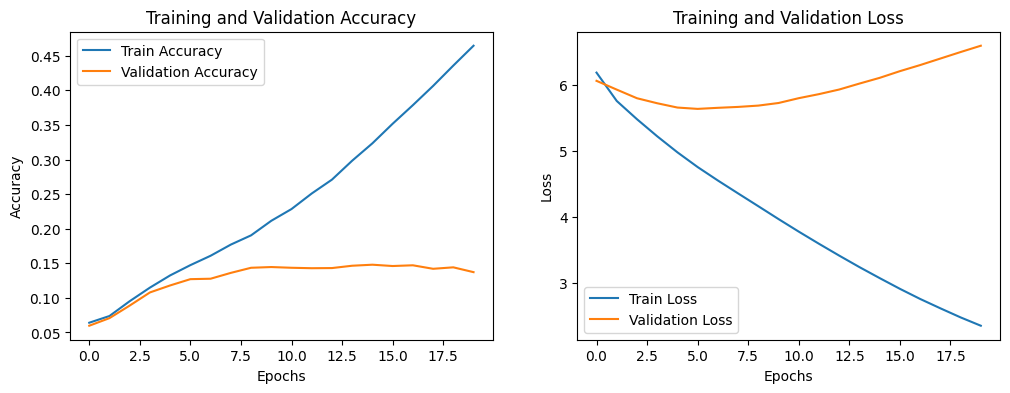

In [13]:
# Plotting the training and validation loss and accuracy
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 200)           550200    
                                                                 
 bidirectional (Bidirection  (None, 15, 512)           703488    
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 15, 512)           2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 15, 512)           0         
                                                                 
 gru_1 (GRU)                 (None, 15, 256)           591360    
                                                                 
 batch_normalization_1 (Bat  (None, 15, 256)          

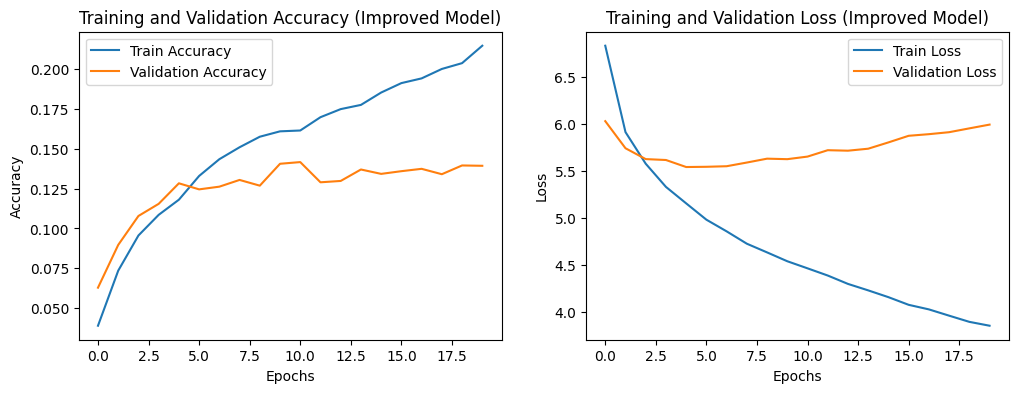

In [14]:
# Define the improved model
# improved_model = Sequential()
# improved_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length - 1))
# improved_model.add(Bidirectional(LSTM(150, return_sequences=True)))
# improved_model.add(LayerNormalization())
# improved_model.add(Dropout(0.5))
# improved_model.add(LSTM(150))
# improved_model.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))

# # # Compile the improved model
# improved_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# # Print the improved model summary
# improved_model.summary()

# # Train the improved model
# history_improved = improved_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=2)

# Define the improved model
# improved_model = Sequential([
#     Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length - 1),
#     Bidirectional(GRU(150, return_sequences=True)),
#     LayerNormalization(),
#     Dropout(0.5),
#     GRU(150),
#     Dense(len(tokenizer.word_index) + 1, activation='softmax')
# ])
improved_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=200, input_length=max_sequence_length - 1),
    Bidirectional(GRU(256, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.5),
    GRU(256, return_sequences=True),
    BatchNormalization(),
    Dropout(0.5),
    GRU(256),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(tokenizer.word_index) + 1, activation='softmax')
])

# Compile the improved model
improved_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the improved model summary
improved_model.summary()

# Define early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the improved model
history_improved = improved_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=2)

# Plot the training and validation accuracy and loss for the improved model
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_improved.history['accuracy'], label='Train Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy (Improved Model)')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_improved.history['loss'], label='Train Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (Improved Model)')

plt.show()

# TODO: Generate text

In [16]:
# TODO: Function to generate text
# def generate_text():
    # TODO

def generate_text(start_text, num_additional_words, model, max_sequence_length, temperature=1.0):
    result = start_text
    for _ in range(num_additional_words):
        # Tokenize the current text
        tokenized_input = tokenizer.texts_to_sequences([result])[0]
        # Pad the tokens to the required sequence length
        tokenized_input = pad_sequences([tokenized_input], maxlen=max_sequence_length-1, padding='pre')

        # Predict the logits for the next word
        predictions = model.predict(tokenized_input, verbose=0)[0]

        # Adjust logits by temperature
        predictions = predictions / temperature

        # Apply softmax to get probabilities
        probabilities = tf.nn.softmax(predictions).numpy()

        # Sample the next word index based on probabilities
        next_word_index = np.random.choice(len(probabilities), p=probabilities)

        # Map the index back to the corresponding word
        next_word = tokenizer.index_word.get(next_word_index, '')

        # Append the word to the current text
        result += ' ' + next_word

    return result

# Generate text
seed_text = "Forest is"
next_words = 10
generated_text_1 = generate_text(seed_text, next_words, model, max_sequence_length, temperature=0.05)
generated_text_2 = generate_text(seed_text, next_words, improved_model, max_sequence_length, temperature=1.5)
generated_text_3 = generate_text(seed_text, next_words, model, max_sequence_length, temperature=0.05)
generated_text_4 = generate_text(seed_text, next_words, improved_model, max_sequence_length, temperature=1.5)

print(generated_text_1)
print(generated_text_2)
print(generated_text_3)
print(generated_text_4)

Forest is great begged the relief accidentally reeling tree lie down tittered
Forest is yourself flinging wonder move ropewill fight seeneverything mouseof steady swimming
Forest is hush oblong and change the position in sugar actually pictures
Forest is im loud welcome least provoking yards whiting fryingpan sighing moments


Q6.7: In the preprocessing step for NLP, removing stop words is often considered important.
We did not perform stop word removal in our text generation task. Should we have done that? Explain
reasons to support your answer.


Answer: For this specific text generation task, the inclusion of stop words ensures that the generated text is coherent, grammatically correct, and natural-sounding. While stop word removal is useful in tasks focused on content analysis or information retrieval (where individual word importance is critical), it is less appropriate for generating fluid and natural language text. Therefore, in this case, keeping stop words is a great approach to achieve more realistic and better quality text generation.